#### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

#### Importing the Dataset

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

#### 1.) Read the dataset and view the first 10 rows of it!

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


#### 2.) Check the shape/dimension of the dataset!

In [6]:
df.shape

(5110, 12)

#### 3.) Check for the missing values.Display number of missing values per column!

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,'No. of missing Values': df.isnull().sum(),
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')

,column_name,No. of missing Values,percent_missing
id,id,0,0.000000
gender,gender,0,0.000000
age,age,0,0.000000
hypertension,hypertension,0,0.000000
heart_disease,heart_disease,0,0.000000
ever_married,ever_married,0,0.000000
work_type,work_type,0,0.000000
Residence_type,Residence_type,0,0.000000
avg_glucose_level,avg_glucose_level,0,0.000000
smoking_status,smoking_status,0,0.000000


The bmi column has 201 missing values which is nearly 4%.

#### 4.) Investigate and predict the missing BMI Value!

In [8]:
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [9]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

#### 5.) Check the datatype, number of non null values and name of each variable in the dataset!

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


* There are 12 columns out of which 3 are float, 4 are int and 5 are object datatype where none of the column has any null value.
* None of the columns has any null values.

#### 6.) Check the descriptive statistics of the dataset!

In [11]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### 7.) Visualize the proportion of Stroke samples in the dataset!

In [15]:
df['stroke'].value_counts(normalize=True
                         )

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

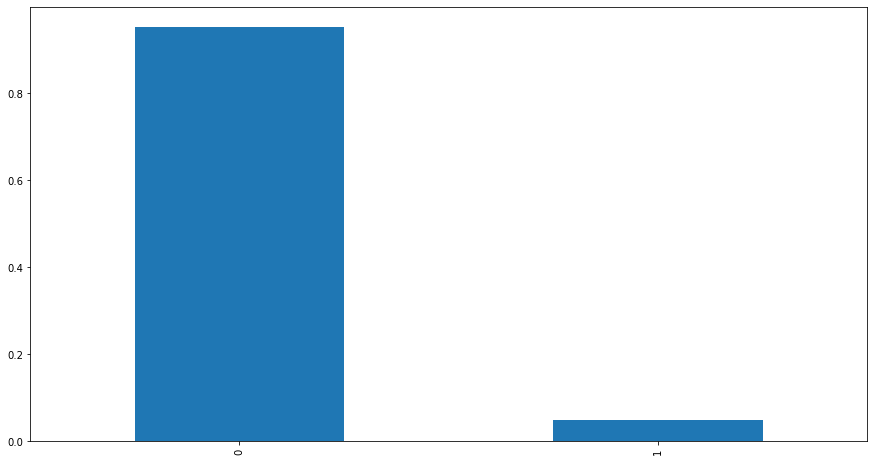

In [11]:
df['stroke'].value_counts(normalize=True).plot(kind='bar')

* We can infer from the dataset that 95% of the people didn't get any stroke.

#### 8.) Visualize the Distribution of Male and Female Ages. Write the Observation!

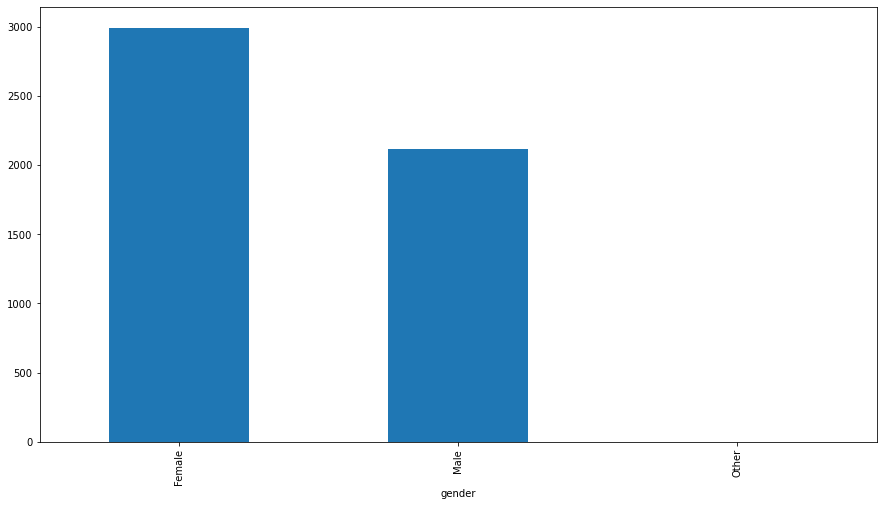

In [13]:
df.groupby('gender')['age'].count().plot(kind = 'bar')
plt.show()

* We can infer from the graph that although the number of females are not predominant but still the female count is significantly greater than that of males.

#### 9.) Visualize the stroke sample based on:

#### a.) BMI and Glucose Level

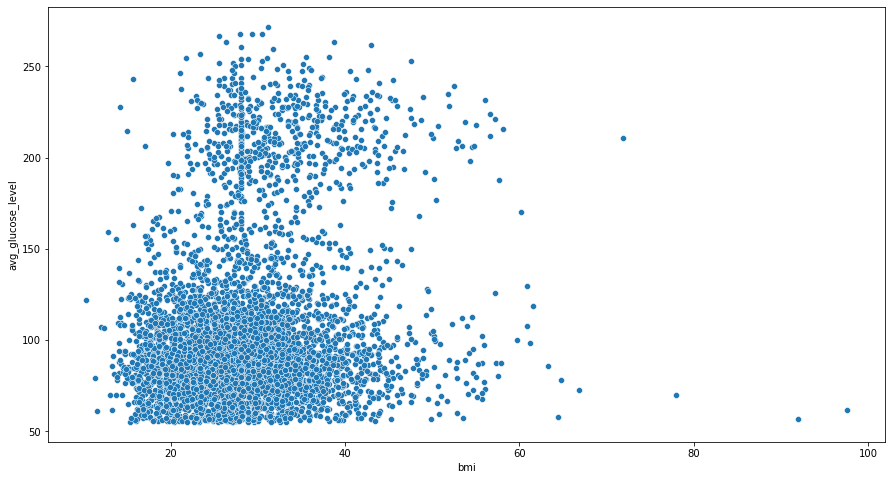

In [16]:
sns.scatterplot(x=df['bmi'],y=df['avg_glucose_level'])
plt.show()

#### b.) BMI and Age

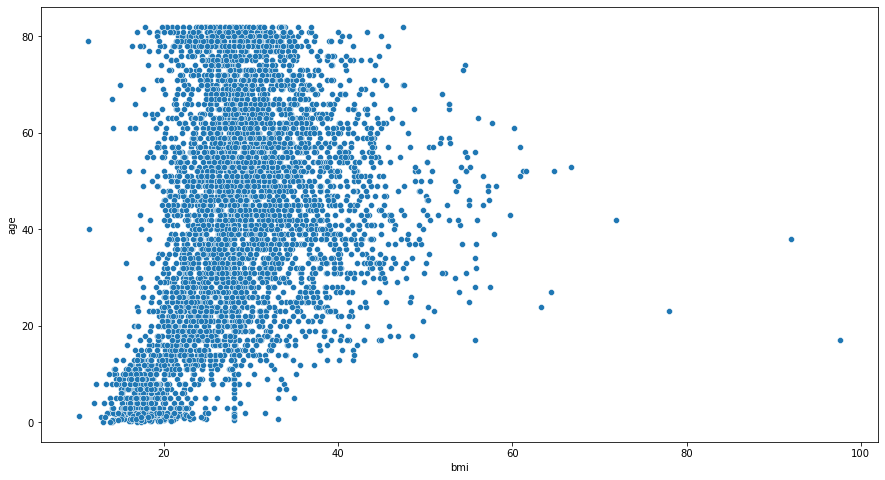

In [19]:
sns.scatterplot(x=df['bmi'],y=df['age'])
plt.show()

#### 10.) Using the pie chart visualizes the proportion of different smoking categories among the stroke population!

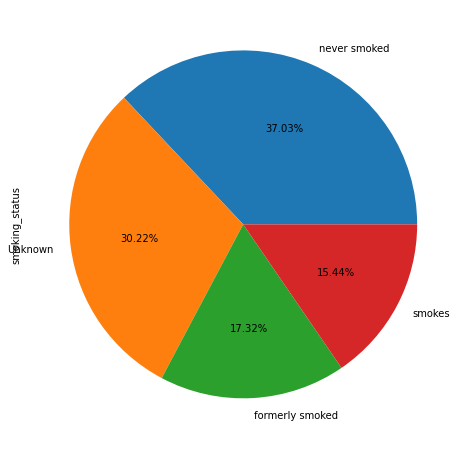

In [20]:
df['smoking_status'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

* We can infer from the graph that there are a relatively higher number of non-smokers as compared to the other categories.

#### 11.) Perform hypothesis testing to find the significant variables!

In [21]:
#H0: The variable is insigificant ( no relationship between variable and target)
#H1: The variable is sigificant ( there is a relationship between variable and target)
# We carry out tests for each column w.r.t the target column
df = df.drop(columns='id')
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [22]:
# Categorical Columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [25]:
# When both the columns that need to be tested are categorical, we will do a chi_square contingency test
from statsmodels.stats import weightstats as stests
from scipy import stats

p_vals = {}
for i in cat_cols:
    table = pd.crosstab(df[i], df['stroke'])
    observed_value = table.values
    chi2, p, dof, expected = stats.chi2_contingency(observed_value,correction=False)
    p_vals[i] = p
    
p_vals

{'gender': 0.7895490538408245,
 'ever_married': 9.58932501427625e-15,
 'work_type': 5.397707801896119e-10,
 'Residence_type': 0.26915903227493193,
 'smoking_status': 2.0853997025008455e-06}

* p-value is greater than 0.05 for gender and residence_type, hence, these columns are insignificant (as we fail to reject null hypothesis) 
* Others are significant (as we reject the null hypothesis)

In [26]:
# Numerical Columns
num_cols = df.drop(columns = 'stroke').select_dtypes(np.number).columns
num_cols

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object')

In [27]:
df['stroke'].value_counts()
# We'll carry out ztest as the sample size for both categories are large

0    4861
1     249
Name: stroke, dtype: int64

In [30]:
p_val = {}
for i in num_cols:
    x1 = df[(df['stroke'] == 0)][i]
    x2 = df[(df['stroke'] == 1)][i]
    z_score, pval = stests.ztest(x1 = x1, x2 = x2 , value = 0, alternative = 'two-sided')
    p_val[i] = pval

p_val

{'age': 4.512034549927382e-73,
 'hypertension': 3.0545852740333194e-20,
 'heart_disease': 2.2171764460236954e-22,
 'avg_glucose_level': 1.8461548402658107e-21,
 'bmi': 0.009809498659843801}

* p-value is greater than 0.05 for bmi, hence, this column is insignificant (as we fail to reject null hypothesis) 
* Others are significant (as we reject the null hypothesis)

#### 12.) Drop the unnecessary columns!

In [32]:
df = df.drop(columns=['gender','Residence_type','bmi'])
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,67.0,0,1,Yes,Private,228.69,formerly smoked,1
1,61.0,0,0,Yes,Self-employed,202.21,never smoked,1
2,80.0,0,1,Yes,Private,105.92,never smoked,1
3,49.0,0,0,Yes,Private,171.23,smokes,1
4,79.0,1,0,Yes,Self-employed,174.12,never smoked,1


#### 13.) Write the code to replace following categories columns in integer format as follow –

#### a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

In [33]:
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [34]:
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2})
df['work_type']

0       0
1       1
2       0
3       0
4       1
       ..
5105    0
5106    1
5107    1
5108    0
5109    2
Name: work_type, Length: 5110, dtype: int64

#### b.) ever_married('Yes': 1, 'No': 0)

In [35]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [36]:
df['ever_married'] = df['ever_married'].replace({'Yes': 1, 'No': 0})
df['ever_married']

0       1
1       1
2       1
3       1
4       1
       ..
5105    1
5106    1
5107    1
5108    1
5109    1
Name: ever_married, Length: 5110, dtype: int64

#### c.) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [37]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [38]:
df['smoking_status'] = df['smoking_status'] .replace({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})
df['smoking_status']

0       2
1       0
2       0
3      -1
4       0
       ..
5105    0
5106    0
5107    0
5108    2
5109    1
Name: smoking_status, Length: 5110, dtype: int64

#### 14.) Check the distribution of 'bmi' and 'stroke' columns in the dataset!

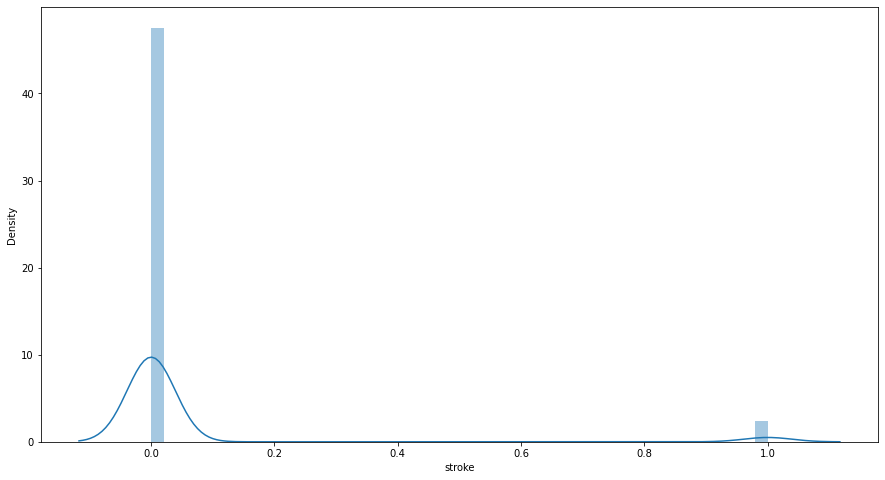

In [40]:
sns.distplot(df['stroke'])
plt.show()

#### 15.) List down columns that are highly skewed!

In [41]:
df.skew()

age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.585971
avg_glucose_level    1.572284
smoking_status       0.082279
stroke               4.193284
dtype: float64

* We can infer that the stroke and heart_disease columns are highly skewed!

#### 16.) List down the columns that are highly kurtosis!

In [42]:
df.kurt()

age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.059562
avg_glucose_level     1.680479
smoking_status       -0.922415
stroke               15.589736
dtype: float64

* We can infer thta the stroke, hypertension and heart_disease columns has higer kurtosis!

#### 17.) Find the distribution of all variables with respect to the outcome 'stroke' variable!

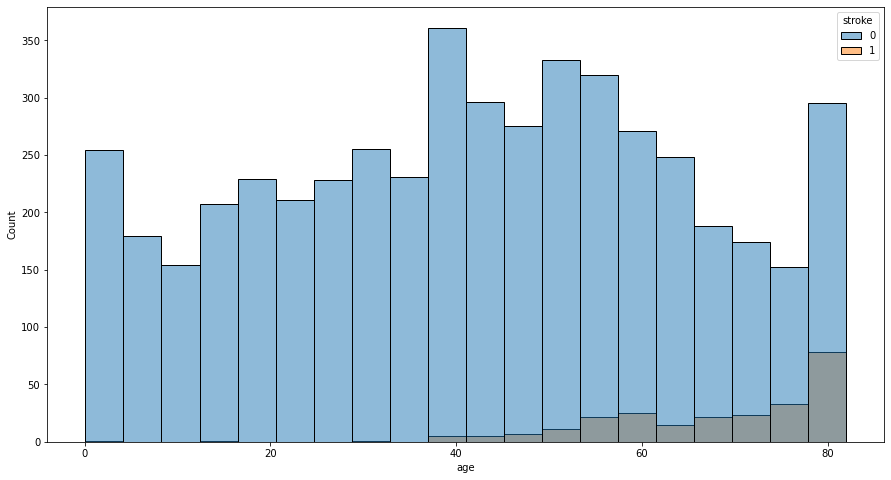

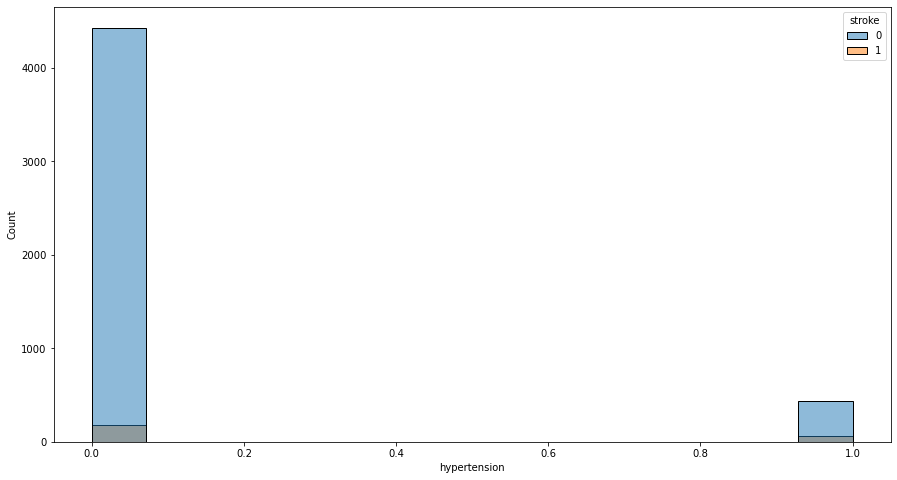

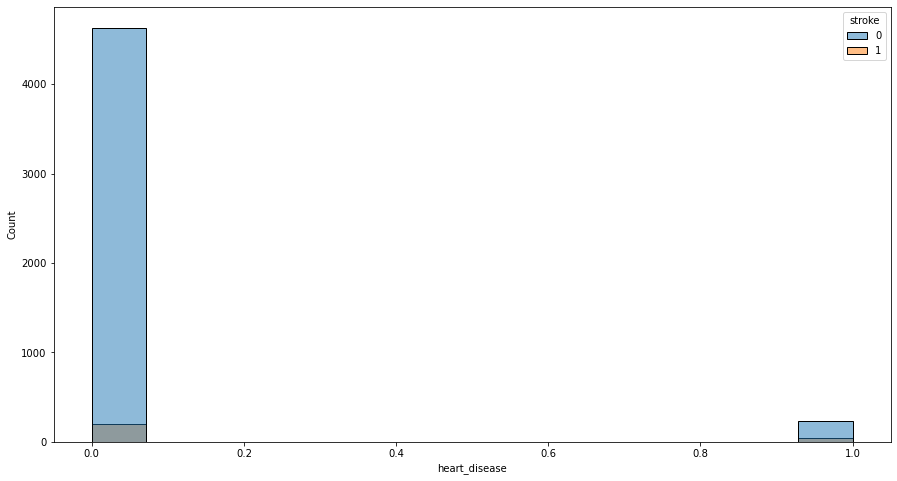

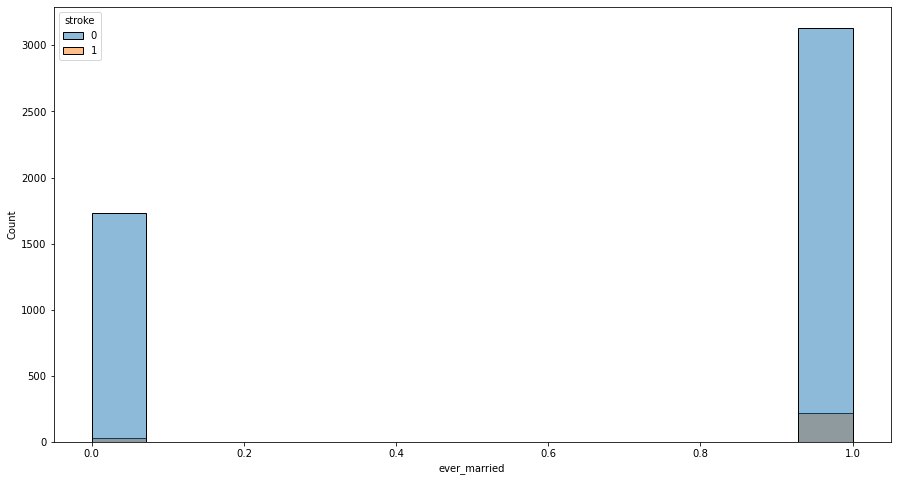

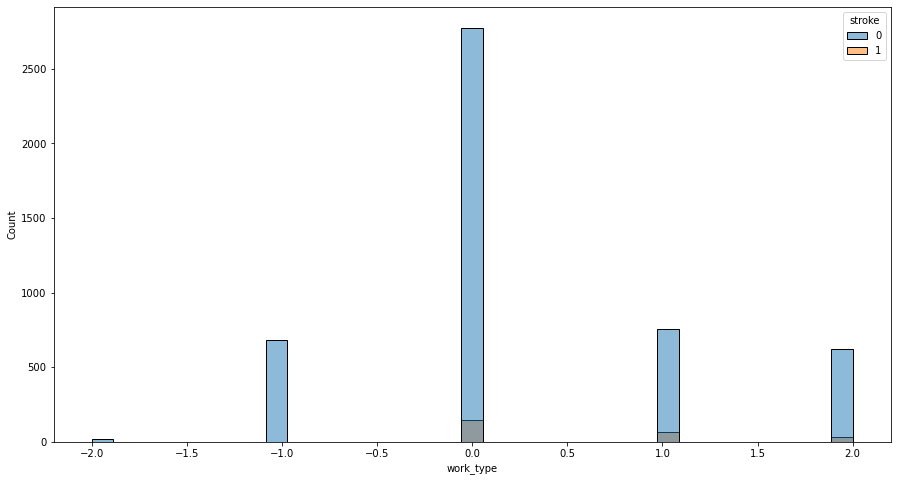

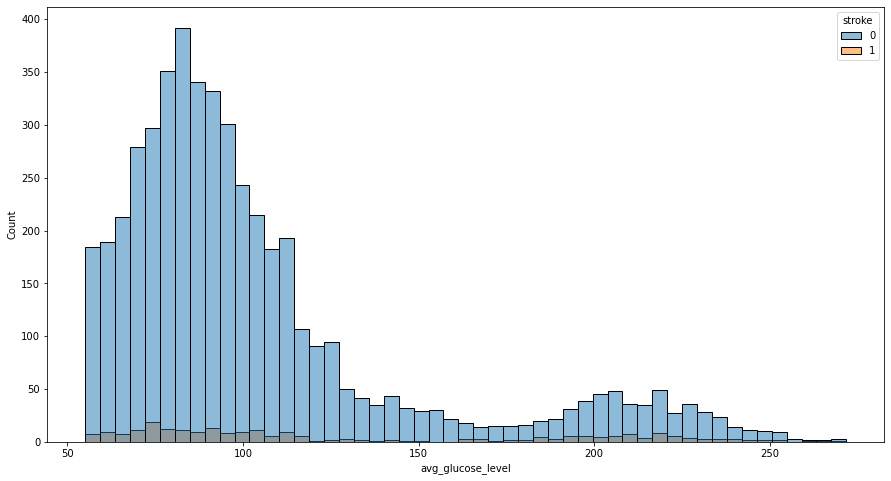

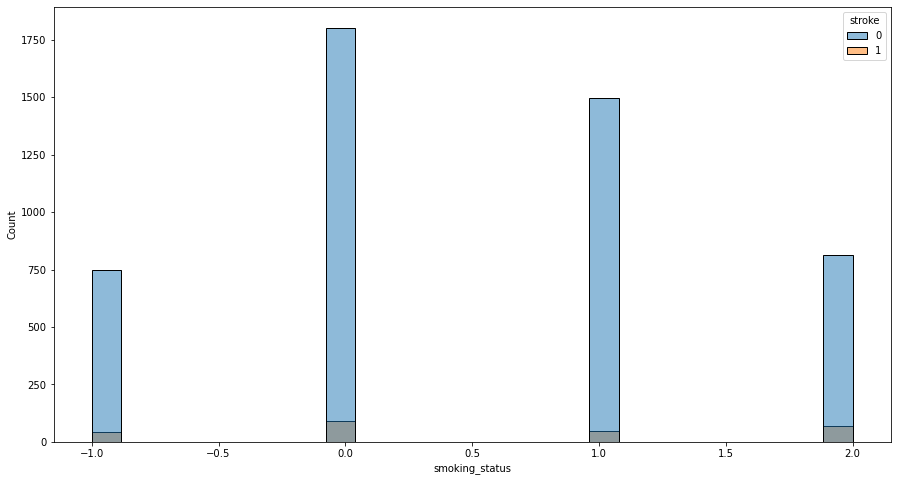

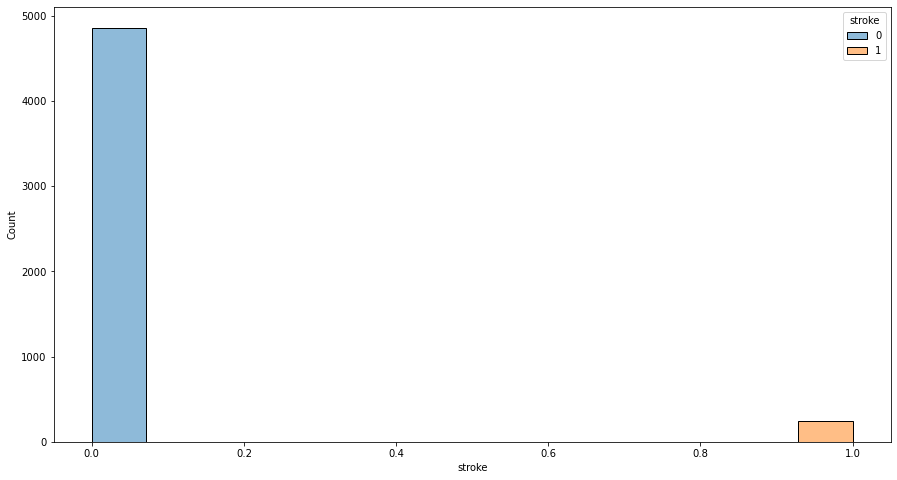

In [43]:
num = df.select_dtypes(exclude="object")
for i in num.columns:   
    sns.histplot(x=df[i],hue = df["stroke"])
    plt.show()

#### 18.) Plot the heatmap for correlation matrix for the given dataset. Write the observation.Especially note down columns that are highly correlated (Positive or negative correlation,consider 0.7 to 1 as high)

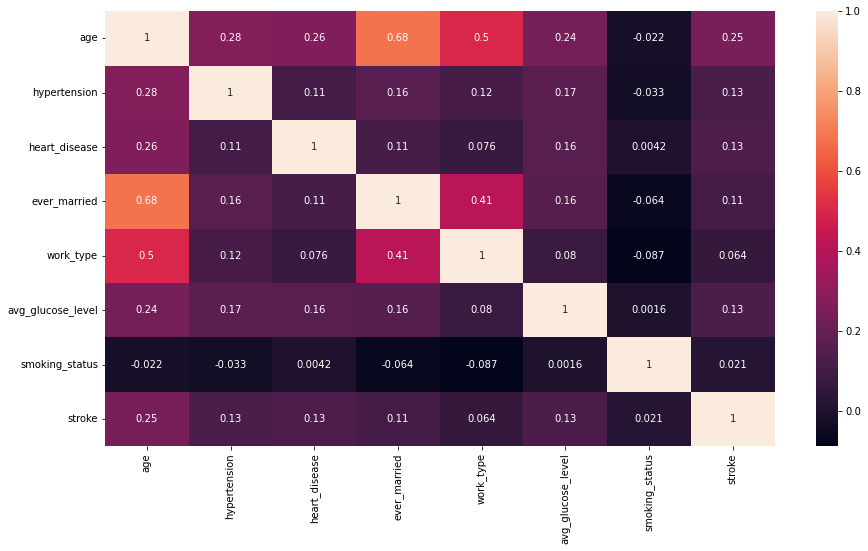

In [45]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* We can infer from the graph that none of the features are having strong corelation with the output variable!

#### 19.) Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio!

In [48]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke',axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [49]:
print('X_train',X_train.shape)
print('X_test',X_train.shape)
print('y_train',X_train.shape)
print('y_test',X_train.shape)

X_train (3577, 7)
X_test (3577, 7)
y_train (3577, 7)
y_test (3577, 7)


#### 20.) Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique!

In [50]:
df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

* We can see that the data is highly imbalanced!

In [53]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42,sampling_strategy=0.7)
X_res,y_res=sm.fit_resample(X_train,y_train)
y_res.value_counts()

0    3417
1    2391
Name: stroke, dtype: int64

#### 21.) Model Selection/hyperparameter tuning!

- Try different models and fine tune their performance until you get the desired level of performance on the given dataset. Model Evaluation!

- Evaluate the models using appropriate evaluation metrics!

In [54]:
# Scaling the Data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_res = pd.DataFrame(data = ss.fit_transform(X_res), columns = X_res.columns)
X_test = pd.DataFrame(data = ss.transform(X_test), columns = X_test.columns)

In [55]:
print(X_res)
print(X_test)

           age  hypertension  heart_disease  ever_married  work_type  \
0    -2.162580     -0.296729      -0.220374     -1.506131  -1.716665   
1    -1.059427     -0.296729      -0.220374     -1.506131  -0.362177   
2    -0.397535      3.370081      -0.220374      0.663953  -0.362177   
3     0.661493      3.370081      -0.220374      0.663953  -0.362177   
4     0.396736     -0.296729      -0.220374      0.663953  -0.362177   
...        ...           ...            ...           ...        ...   
5803  1.173705     -0.296729      -0.220374      0.663953  -0.362177   
5804  0.848859     -0.296729      -0.220374      0.663953  -0.362177   
5805  0.678104     -0.296729      -0.220374      0.663953  -0.362177   
5806  0.783844     -0.296729      -0.220374     -1.506131   0.992312   
5807 -0.471796      3.370081      -0.220374      0.663953  -0.362177   

      avg_glucose_level  smoking_status  
0             -0.484124        0.644405  
1              1.746541       -1.686045  
2        

###### Random Forest Classification

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_res, y_res)

In [60]:
from sklearn.metrics import classification_report

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1444
           1       0.18      0.24      0.20        89

    accuracy                           0.89      1533
   macro avg       0.56      0.58      0.57      1533
weighted avg       0.91      0.89      0.90      1533



In [61]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

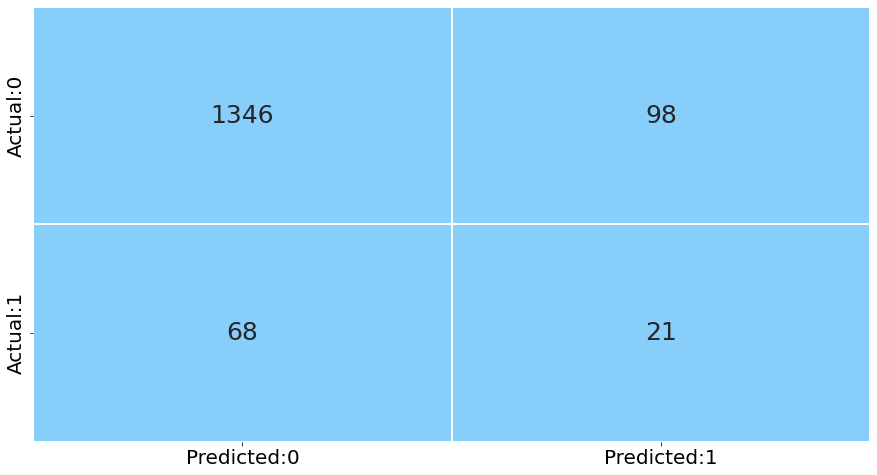

In [70]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

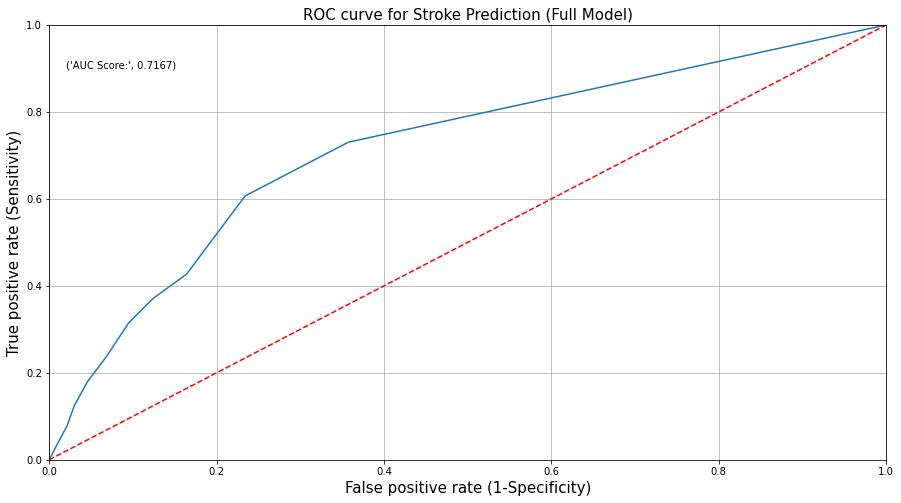

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [75]:
from sklearn.model_selection import GridSearchCV

tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]

random_forest_classification = RandomForestClassifier(random_state = 10)

rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

rf_grid_model = rf_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10} 



In [81]:
rf_classification = RandomForestClassifier(criterion= 'entropy', max_depth=10, max_features='sqrt',
                                           max_leaf_nodes=2, min_samples_leaf=1, min_samples_split=2, n_estimators=10)
rf_model_tuned = rf_classification.fit(X_res, y_res)

In [82]:
y_pred_tuned = rf_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1444
           1       0.22      0.34      0.27        89

    accuracy                           0.89      1533
   macro avg       0.59      0.63      0.60      1533
weighted avg       0.91      0.89      0.90      1533



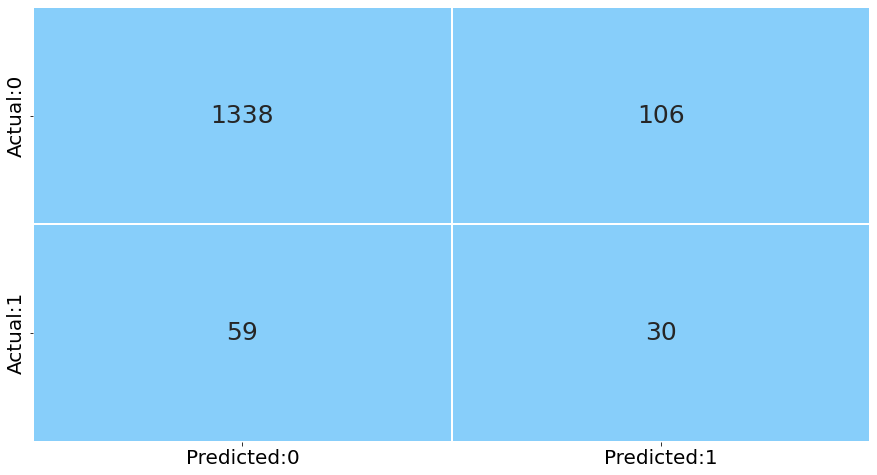

In [83]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

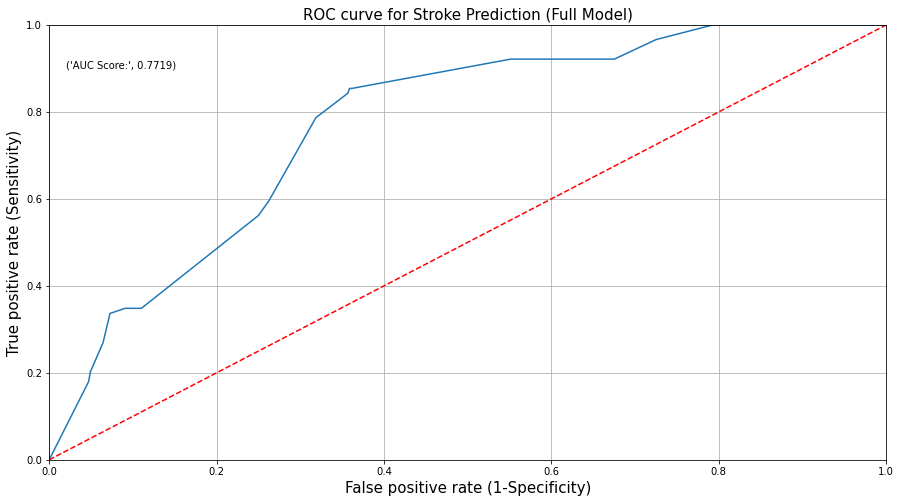

In [84]:
y_pred_prob_tuned = rf_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)

- As We can see that Accuracy has increased along with slight increase in F1 and AUC score, So we can infer that the model performance has increased!

###### Logistic Regression Classifier

In [85]:
from sklearn.linear_model import LogisticRegression

LR =LogisticRegression()
lr_model=LR.fit(X_res, y_res)

In [86]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1444
           1       0.15      0.46      0.23        89

    accuracy                           0.82      1533
   macro avg       0.56      0.65      0.56      1533
weighted avg       0.92      0.82      0.86      1533



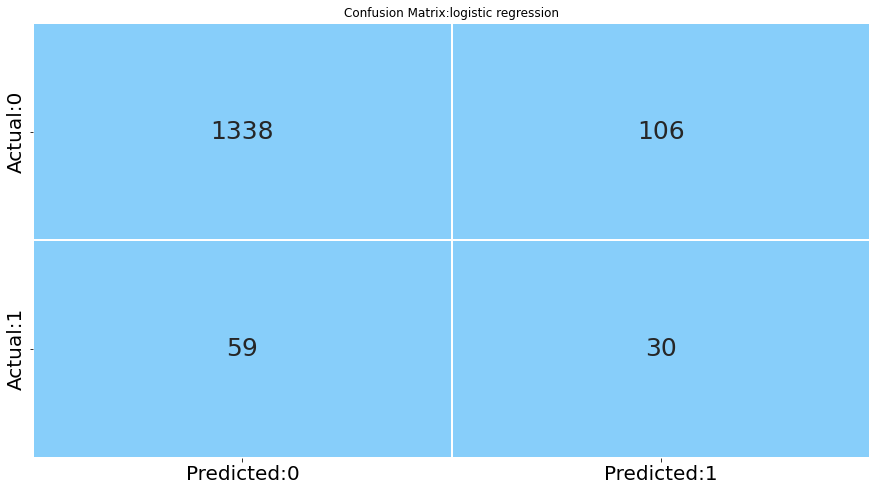

In [87]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:logistic regression')
plt.show()

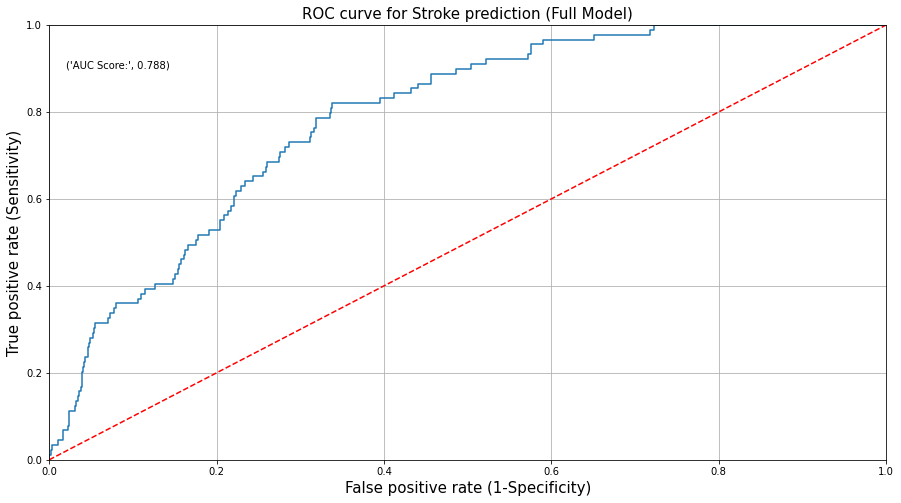

In [88]:
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [89]:
tuned_paramaters = [{'C': [0.3,0.7,1]}]
                     

logistic_regression = LogisticRegression(random_state = 10)

lr_grid = GridSearchCV(estimator =logistic_regression, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

lr_grid_model = lr_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', lr_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'C': 0.3} 



In [90]:
lr_classification = LogisticRegression(C=.03)
lr_model_tuned = lr_classification.fit(X_res, y_res)

In [91]:
y_pred_tuned = lr_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1444
           1       0.16      0.47      0.24        89

    accuracy                           0.82      1533
   macro avg       0.56      0.66      0.57      1533
weighted avg       0.92      0.82      0.86      1533



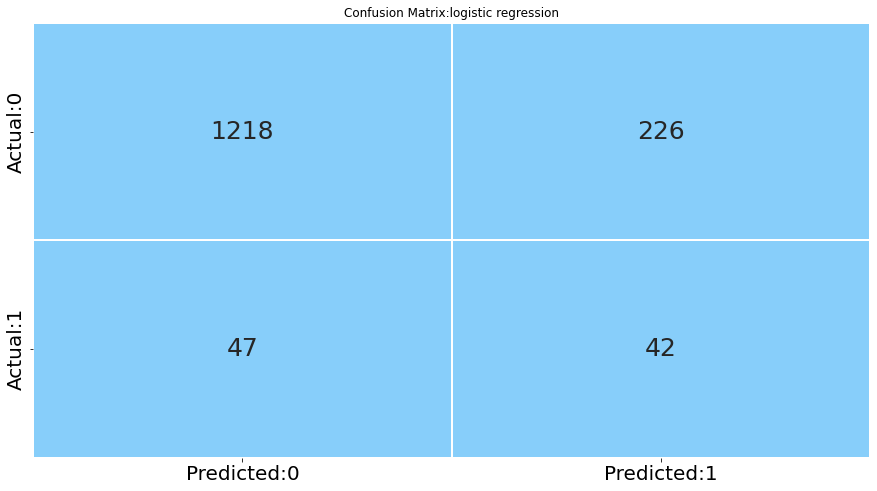

In [92]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:logistic regression')
plt.show()

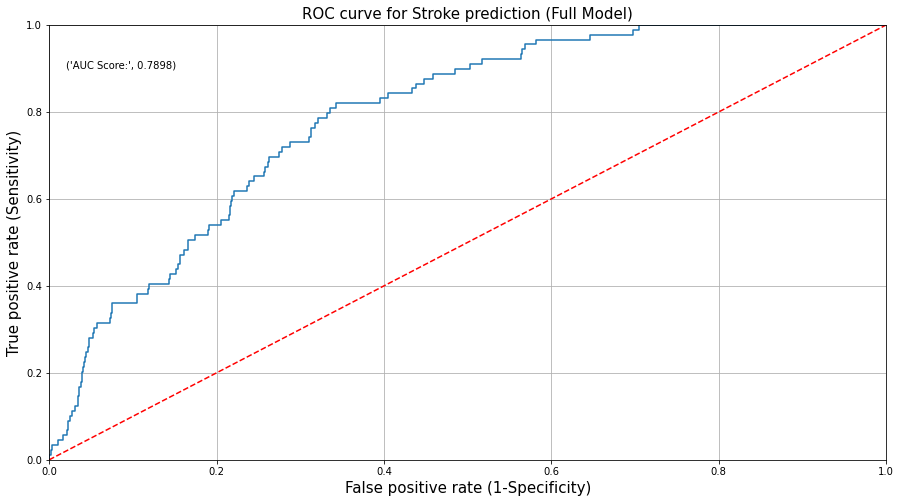

In [93]:
y_pred_prob_tuned = lr_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)

- As we can see that Accuracy is almost same and there's is almost no change in the Accuracy, Also The f1-score and Auc score has a very slight increase, so we can infer that there is no significant improvement after the hyparameter tuning.

###### ADA Boost Classifier

In [95]:
from sklearn.ensemble import AdaBoostClassifier

AD =AdaBoostClassifier()
ad_model=AD.fit(X_res, y_res)

In [96]:
y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1444
           1       0.15      0.46      0.23        89

    accuracy                           0.82      1533
   macro avg       0.56      0.65      0.56      1533
weighted avg       0.92      0.82      0.86      1533



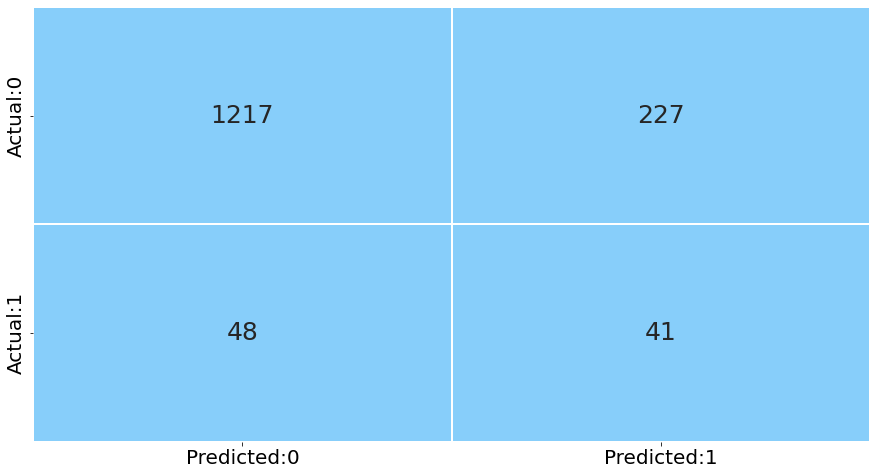

In [97]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

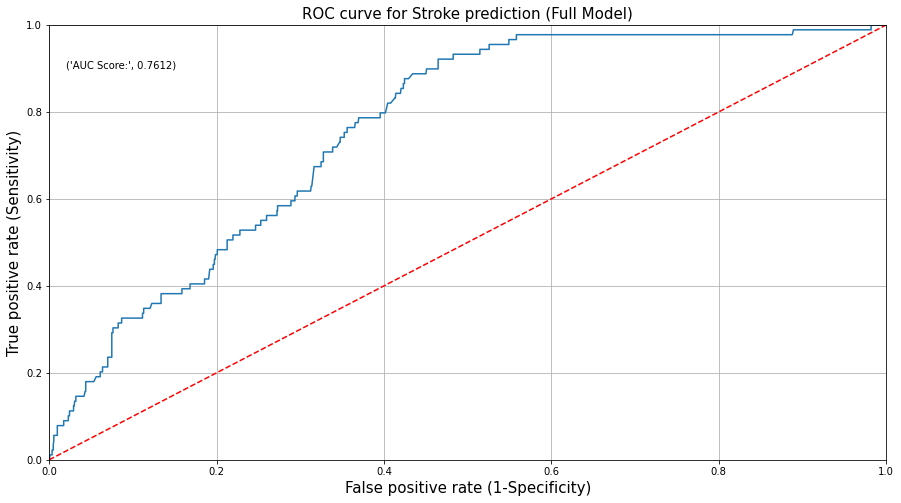

In [98]:
y_pred_prob = ad_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [99]:
tuned_paramaters = [{'n_estimators' : [50, 100, 150], 'random_state' : [10]}]

adaboost_classification = AdaBoostClassifier(random_state = 10)

ad_grid = GridSearchCV(estimator = adaboost_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

ad_grid_model = ad_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', ad_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'n_estimators': 100, 'random_state': 10} 



In [100]:
ad_classification = AdaBoostClassifier(n_estimators=100)
ad_model_tuned = ad_classification.fit(X_res, y_res)

In [101]:
y_pred_tuned = ad_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1444
           1       0.12      0.37      0.19        89

    accuracy                           0.81      1533
   macro avg       0.54      0.60      0.54      1533
weighted avg       0.91      0.81      0.85      1533



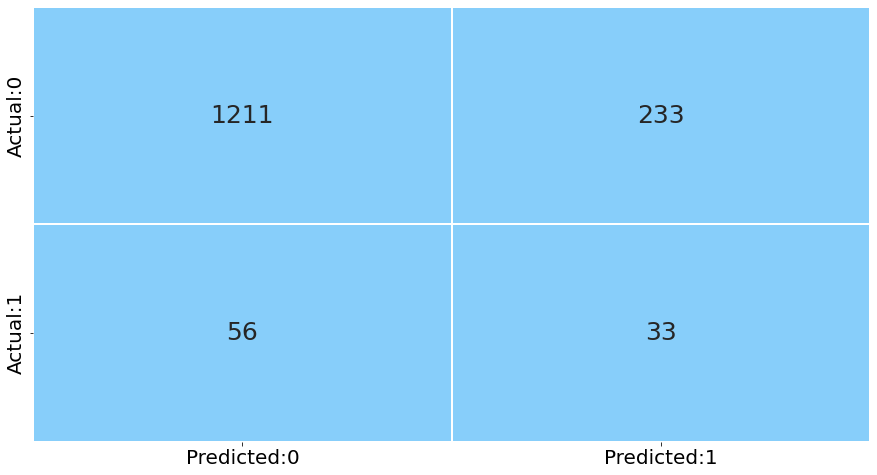

In [102]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

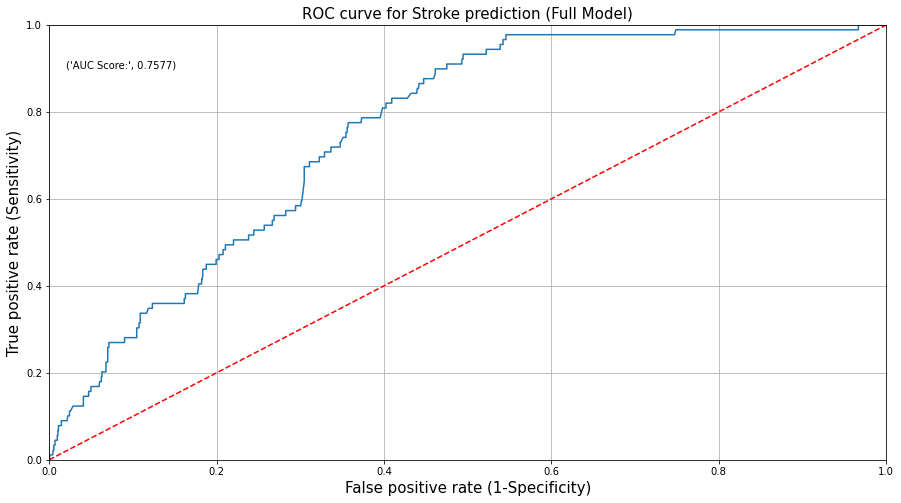

In [103]:
y_pred_prob_tuned = ad_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)

- We ignore this model as we can see that AUC-score, accuracy and f1-score are slightly reduced after the hyperparameter tuning.

###### Decision Tree Classifier

In [105]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree.fit(X_res, y_res)

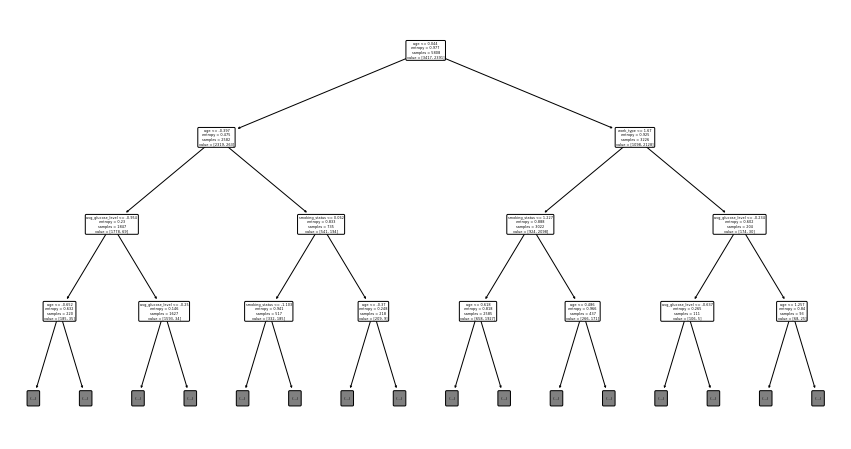

In [106]:
tree.plot_tree(decision_tree, max_depth=3, feature_names = X_train.columns, rounded=True)
plt.show()

In [107]:
# MEASURES ON THE TRAIN SET

train_pred = decision_tree.predict(X_res)
train_report = classification_report(y_res, train_pred)
print(train_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3417
           1       1.00      1.00      1.00      2391

    accuracy                           1.00      5808
   macro avg       1.00      1.00      1.00      5808
weighted avg       1.00      1.00      1.00      5808



In [108]:
# MEASURES ON THE TEST SET

test_pred = decision_tree.predict(X_test)
test_report = classification_report(y_test, test_pred)
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1444
           1       0.16      0.28      0.20        89

    accuracy                           0.87      1533
   macro avg       0.56      0.59      0.57      1533
weighted avg       0.91      0.87      0.89      1533



- Interpretation: From the above output, we can see that there is a slight difference between the train and test accuracy; thus, we can conclude that the decision tree is less over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

In [109]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2,6),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1,6)
}]
 
decision_tree = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

tree_grid_model = tree_grid.fit(X_train, y_train)

print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': 2, 'min_samples_leaf': 1, 'min_samples_split': 2} 



In [110]:
decision_tree_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

decision_tree_model = decision_tree_model.fit(X_res, y_res)

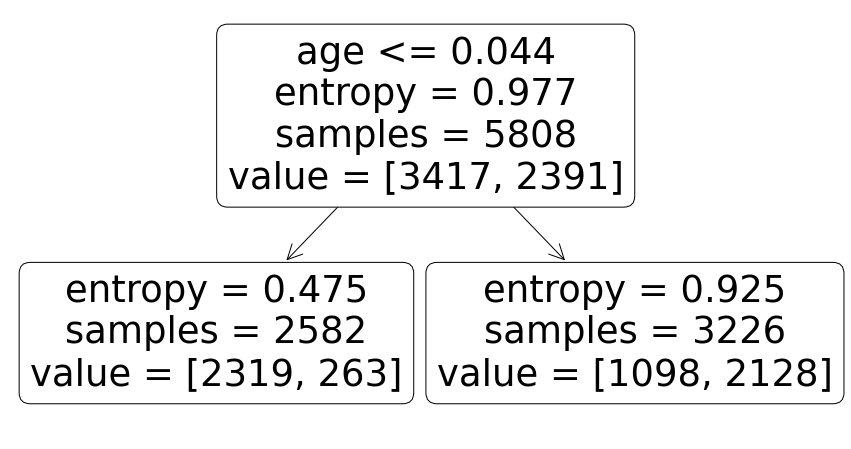

In [111]:
# Plot the decision tree with tuned hyperparameters.

tree.plot_tree(decision_tree_model,feature_names=X_res.columns,rounded=True)
plt.show()

In [112]:
Train_pred = decision_tree_model.predict(X_res)
Train_report = classification_report(y_res, Train_pred)

print('Classification Report for train set: \n', Train_report)

Classification Report for train set: 
               precision    recall  f1-score   support

           0       0.90      0.68      0.77      3417
           1       0.66      0.89      0.76      2391

    accuracy                           0.77      5808
   macro avg       0.78      0.78      0.77      5808
weighted avg       0.80      0.77      0.77      5808



In [113]:
Test_pred = decision_tree_model.predict(X_test)
Test_report = classification_report(y_test, test_pred)

print('Classification Report for test set: \n', Test_report)

Classification Report for test set: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      1444
           1       0.16      0.28      0.20        89

    accuracy                           0.87      1533
   macro avg       0.56      0.59      0.57      1533
weighted avg       0.91      0.87      0.89      1533



- We can see that there is no change in f1 score and accuracy after tuning the data.

###### KNN Classifier

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer

KNN =KNeighborsClassifier()
knn_model=KNN.fit(X_res, y_res)

In [115]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1444
           1       0.15      0.36      0.21        89

    accuracy                           0.84      1533
   macro avg       0.55      0.62      0.56      1533
weighted avg       0.91      0.84      0.87      1533



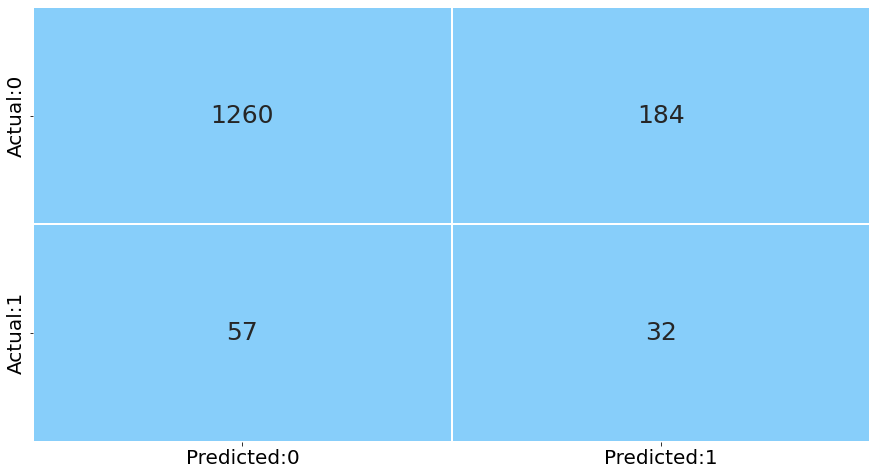

In [116]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

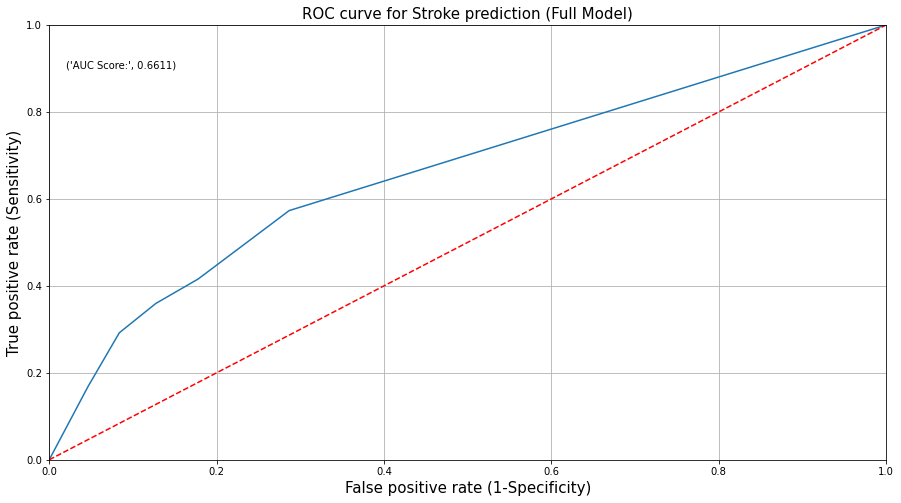

In [117]:
y_pred_prob = knn_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [118]:
tuned_paramaters = [{'n_neighbors' : [4, 6, 8, 10], 'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']}]

knn_classification =KNeighborsClassifier()

knn_grid = GridSearchCV(estimator = knn_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

knn_grid_model = knn_grid.fit(X_train, y_train)

print('Best parameters for random forest classifier: ', knn_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'metric': 'euclidean', 'n_neighbors': 10} 



In [119]:
knn_classification = KNeighborsClassifier(n_neighbors=10,metric='euclidean')
knn_model_tuned = knn_classification.fit(X_res, y_res)

In [120]:
y_pred_tuned = knn_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1444
           1       0.13      0.31      0.19        89

    accuracy                           0.84      1533
   macro avg       0.54      0.59      0.55      1533
weighted avg       0.91      0.84      0.87      1533



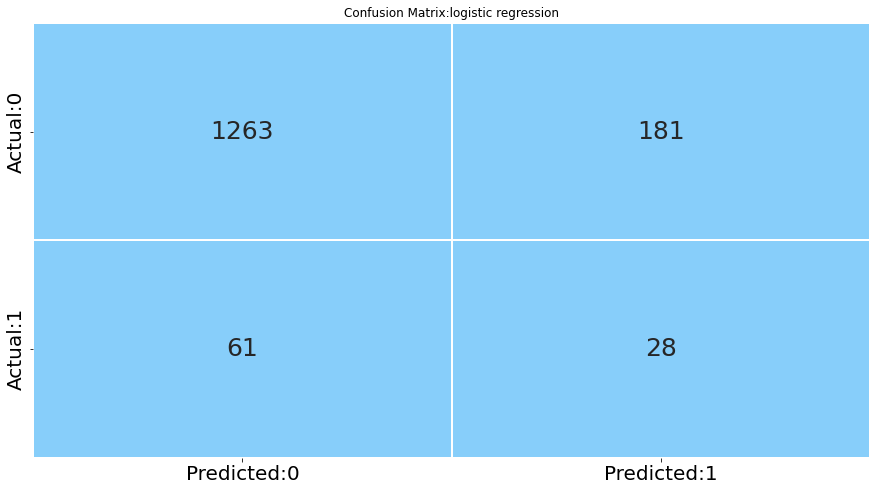

In [121]:
cm = confusion_matrix(y_test, y_pred_tuned)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Confusion Matrix:logistic regression')
plt.show()

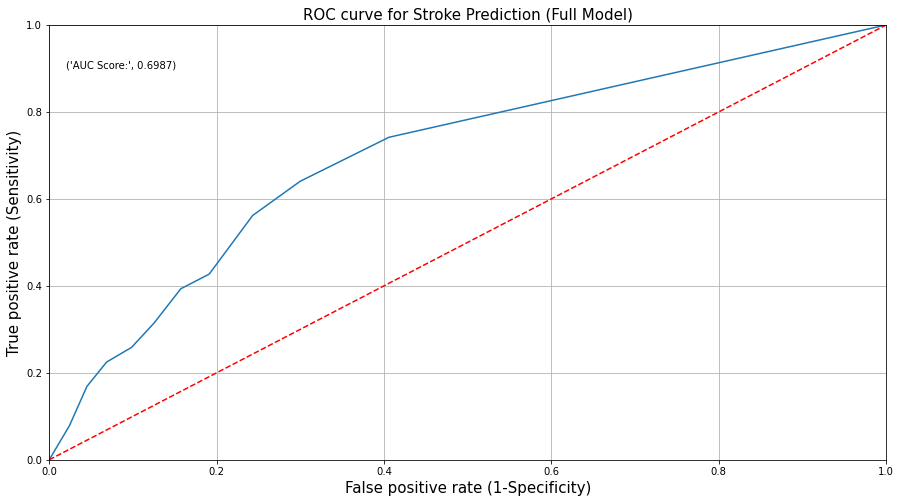

In [122]:
y_pred_prob_tuned = knn_model_tuned.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_tuned)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Stroke Prediction (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob_tuned),4)))
plt.grid(True)

- There is no change in accuracy, f1 score for positive class has reduced and auc score has increased after tuning, so we will not consider this model.

###### XGBoost Classifier

In [127]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model on train data
xgb_model.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [128]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

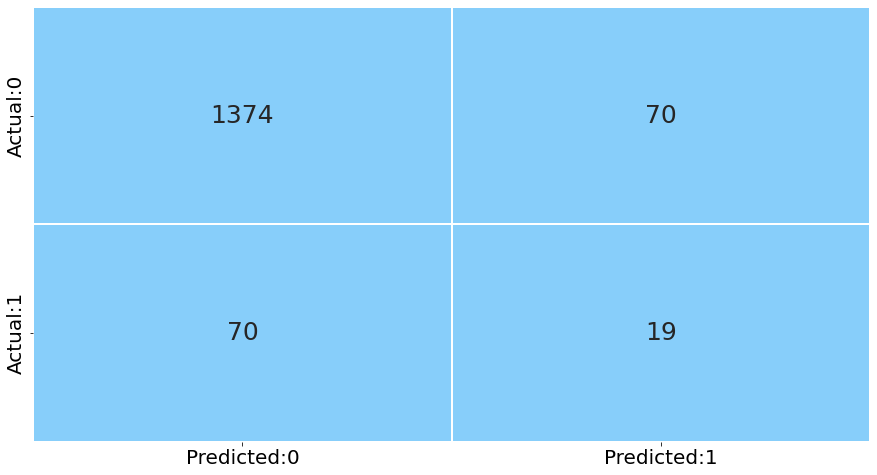

In [129]:
# call the function to plot the confusion matrix
# pass the XGBoost model to the function
plot_confusion_matrix(xgb_model)

In [130]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

In [131]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1444
           1       0.21      0.21      0.21        89

    accuracy                           0.91      1533
   macro avg       0.58      0.58      0.58      1533
weighted avg       0.91      0.91      0.91      1533



In [132]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Stroke prediction', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

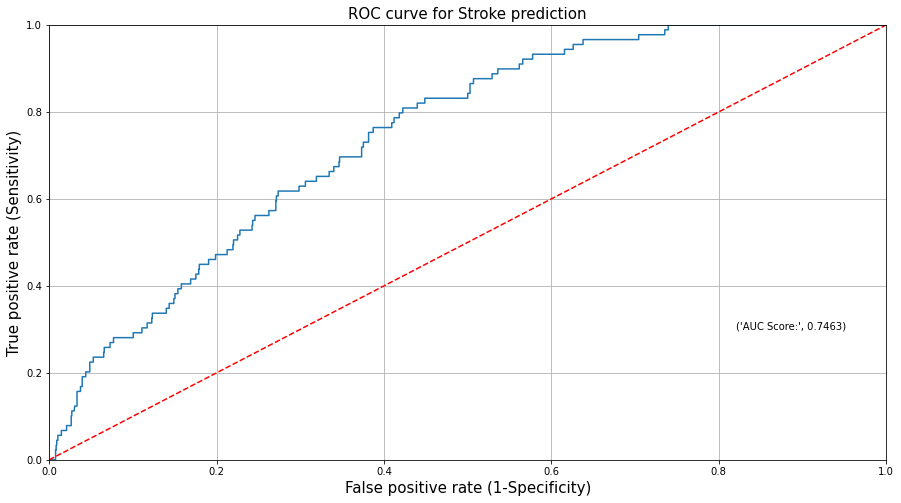

In [133]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

In [134]:
# create a dictionary with hyperparameters and its values
# learning_rate: pass the list of boosting learning rates
# max_depth: pass the range of values as the maximum tree depth for base learners
# gamma: pass the list of minimum loss reduction values required to make a further partition on a leaf node of the tree
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

# instantiate the 'XGBClassifier' 
xgb_model = XGBClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the XGBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 4, 'learning_rate': 0.5, 'max_depth': 4} 



In [135]:
# instantiate the 'XGBClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

# use fit() to fit the model on the train set
xgb_model = xgb_grid_model.fit(X_train, y_train)

# print the performance measures for test set for the model with best parameters
print('Classification Report for test set:\n', get_test_report(xgb_model))

Classification Report for test set:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



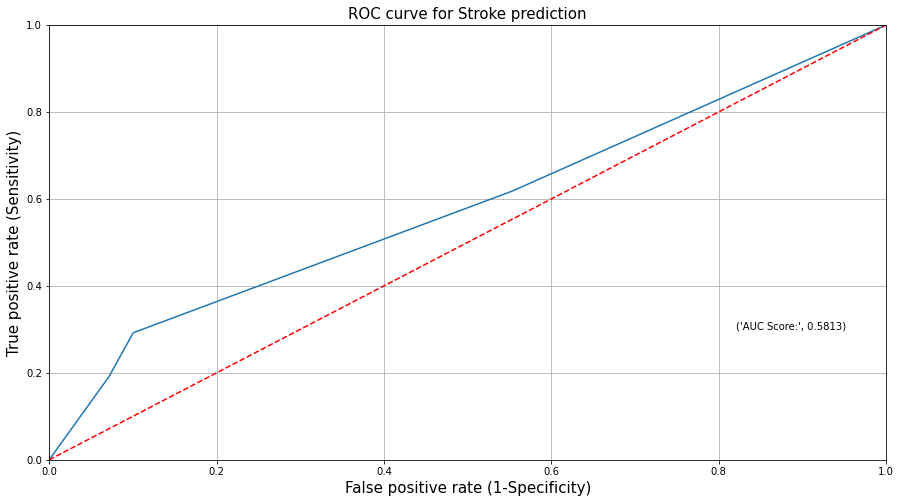

In [136]:
# call the function to plot the ROC curve
# pass the XGBoost model to the function
plot_roc(xgb_model)

- We can see that the accuracy of final XGboost model has increased from 91% to 94% after tuning of Hyperparameters of base model. However the AUC score of final XGboost model has decreased from 74.63% to 58.13% and f1 score has become 0 for positive class after tuning of Hyperparameters of base model. Hence we cannot consider this model

#### Inference

* We can infer from all the above models that the Random Forest Model has the best merics compared to all the other models (f1-score for 0: 0.94, f1-score for 1: 0.22, Accuracy = 0.89, and roc-auc-score = 0.77). Hence, we will use the tuned random forest model as our final model.